In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
#sys.path.append('/home/jl12e12/PLATUS/')
#sys.path.append('/home/jl12e12/PLATUS/fortran/lib/')
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
tikz=True
pdf=True
import os

import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import gc

from mpl_toolkits.mplot3d import axes3d

In [77]:
import lib_subspaces as lsub
from matplotlib.backends.backend_pdf import PdfPages

In [5]:
cd ~/HPT_500k/HPT_LS05_DOM30_TI5/Subspaces/

/mnt/drive2/re_500k/HPT_LS05_DOM30_TI5/Subspaces


In [6]:
%%time
blocks=[1]
n_bl=len(blocks)
start_TS=5400601
stop_TS= 5500101
inc_TS=500
steps=range(start_TS,stop_TS,inc_TS)
turned_1=lsub.subspace('TURNED',21,start_TS,blocks,source_folder='./')
turned_1.load_grid()
turned_1.load_data(steps,read_all=True)

The dataset requires 6153.465271 Mb of RAM
CPU times: user 1min 34s, sys: 50.1 s, total: 2min 24s
Wall time: 12min 2s


In [22]:
tau_w=lsub.subspace('WALL_SH_HEAT',20,start_TS,blocks,source_folder='./')
tau_w.load_grid()
tau_w.load_data(steps,read_all=True)

1 224 386
The dataset requires 262.547852 Mb of RAM
1 224 386


(4, 199, 1, 224, 386)

<IPython.core.display.Javascript object>


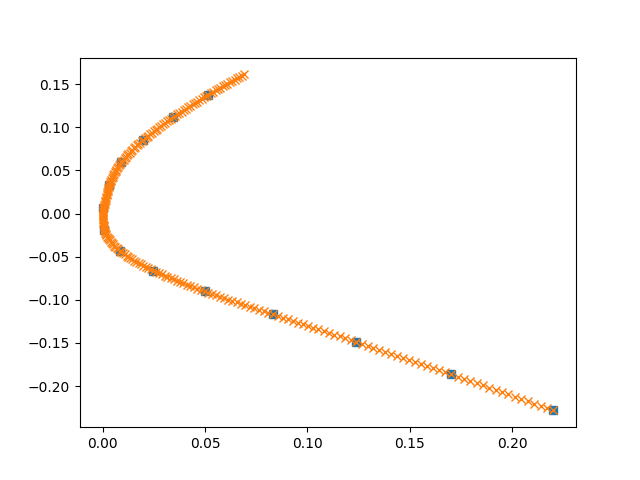

In [24]:
plt.figure()
for ib in range(n_bl):
    plt.plot(turned_1.grid[ib][0,-1,:,0],turned_1.grid[ib][1,-1,:,0],'s')
    plt.plot(tau_w.grid[ib][0,0,:,0],tau_w.grid[ib][1,0,:,0],'x')    

# Get mean Flow Field

In [33]:
turned_mean=[]
for ib in range(n_bl):
    nx,ny,nz=turned_1.header[0][ib]
    turned_mean.append(np.empty([nx,ny,2]))
    for i,j in enumerate([[2,4],[3,5]]):
        turned_mean[ib][:,:,i]=turned_1.data[ib][j[0],0,:,:,0]-turned_1.data[ib][j[1],0,:,:,0]

<IPython.core.display.Javascript object>


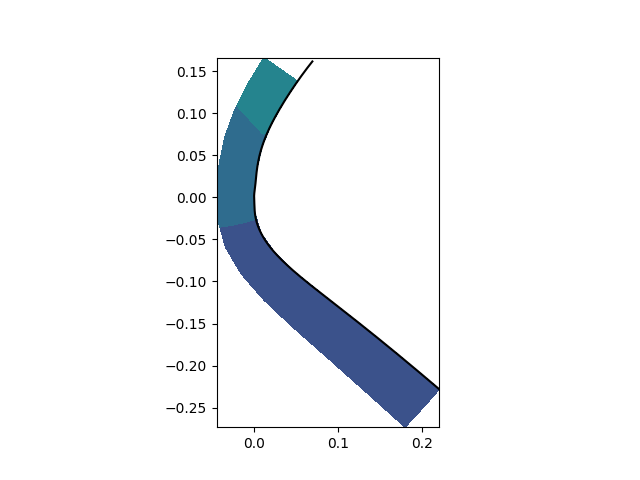

In [26]:
plt.figure()
plt.axes(aspect=1.)
for ib in range(n_bl):
    plt.plot(tau_w.grid[ib][0,0,:,0],tau_w.grid[ib][1,0,:,0],'k')
    plt.contourf(turned_1.grid[ib][0,:,:,0],turned_1.grid[ib][1,:,:,0],turned_mean[ib][:,:,0],levels=np.linspace(-3,7.,11))

<IPython.core.display.Javascript object>


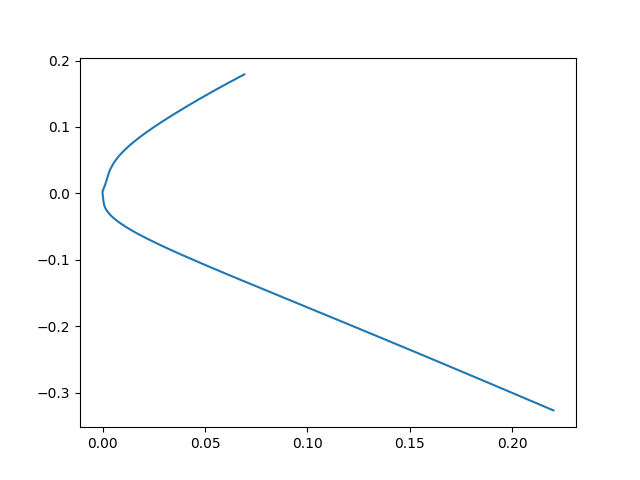

Leading edge index 124


In [27]:
plt.figure()
dist=[]
dist_red=[]
for ib in range(n_bl):
    nx,ny,nz=tau_w.header[0][ib]
    dist.append(np.empty(ny))
    dist_red.append(np.empty(ny/16))
    if ib==0:
        dist[ib][0]=0.
    else:
        dist[ib][0]=dist[ib-1][-1]
    for j in range(1,ny):
        dist[ib][j]=dist[ib][j-1]+np.sqrt((tau_w.grid[ib][0,0,j,0]-tau_w.grid[ib][0,0,j-1,0])**2
                                         +(tau_w.grid[ib][1,0,j,0]-tau_w.grid[ib][1,0,j-1,0])**2)
    if ib==0:
        temp1=100.
        for j in range(ny):
            if tau_w.grid[ib][0,0,j,0]<temp1:
                i_min=j
                temp1=tau_w.grid[ib][0,0,j,0]
        temp1=dist[ib][i_min]
        dist[ib][:]-=temp1
    dist_red[ib][:]=dist[ib][0:-1:16]
    plt.plot(tau_w.grid[ib][0,0,:,0],dist[ib])
print 'Leading edge index %i'%i_min    

In [ ]:
# fig=plt.figure()
# ax = fig.add_subplot(1, 1, 1, projection='3d')
# ax.set_aspect(1.)
# ax.view_init(azim=-45, elev=30)
# for ib in range(n_bl):
#     nx,ny,nz=tau_w.header[0][ib]      
#     ax.plot_surface(tau_w.grid[ib][0,0,:,:],tau_w.grid[ib][2,0,:,:],tau_w.grid[ib][1,0,:,:],color='b'
#                 ,rstride=10, cstride=10, alpha=0.3)   
#     ax.set_xlim([-0.1,1.1])
#     ax.set_ylim([-1.1,0.5])    
#     nx,ny,nz=turned_1.header[0][ib]  
#     for j in range(0,ny):
#         ax.plot_surface(turned_1.grid[ib][0,:,j,:],turned_1.grid[ib][2,:,j,:],turned_1.grid[ib][1,:,j,:],color='k'
#                 ,rstride=10, cstride=10, alpha=0.3)
#         ax.plot_surface(turned_1.grid[ib][0,:,j,:],turned_1.grid[ib][2,:,j,:],turned_1.grid[ib][1,:,j,:],color='k'
#                 ,rstride=10, cstride=10, alpha=0.3)
#     extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
#     sz = extents[:,1] - extents[:,0]
#     centers = np.mean(extents, axis=1)
#     maxsize = max(abs(sz))
#     r = maxsize/2
#     for ctr, dim in zip(centers, 'xyz'):
#         getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)
#     plt.savefig('planes_considered.pdf')

<IPython.core.display.Javascript object>


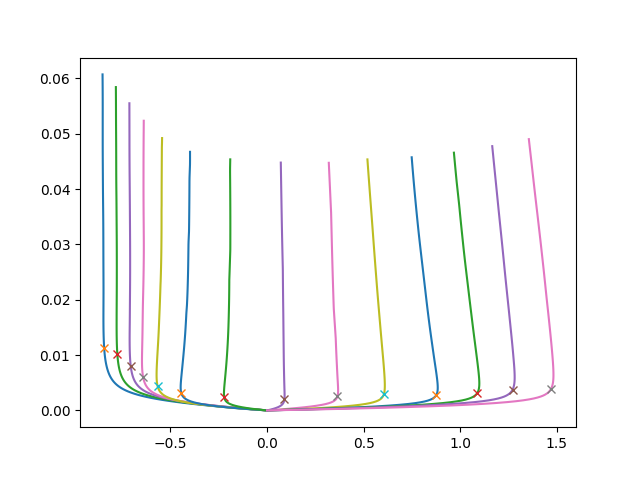

In [29]:
j=8
ib=0
bl_ind=[]
u_t_max=[]
for ib in range(n_bl):
    nx,ny,nz=turned_1.header[0][ib]
    temp=[]
    temp_u=[]
    plt.figure()
    for j in range(ny):
        temp1=np.argmax(np.abs(turned_mean[ib][:,j,0]))
        for i in range(nx):
            if abs(turned_mean[ib][nx-i-1,j,0])>0.99*abs(turned_mean[ib][temp1,j,0]):
                temp.append(nx-i-1)
                temp_u.append(turned_mean[ib][nx-i-1,j,0])
                break
        plt.plot(turned_mean[ib][:,j,0],turned_1.data[ib][1,0,:,j,0])
        plt.plot(turned_mean[ib][temp[-1],j,0],turned_1.data[ib][1,0,temp[-1],j,0],'x')   
    bl_ind.append(temp)
    u_t_max.append(temp_u)

<IPython.core.display.Javascript object>


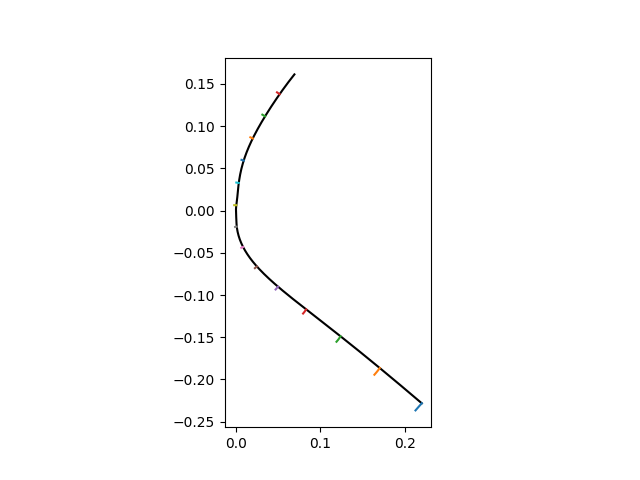

In [30]:
plt.figure()
plt.axes(aspect=1.)
for ib in range(n_bl):
    nx,ny,nz=turned_1.header[0][ib]
    plt.plot(tau_w.grid[ib][0,0,:,0],tau_w.grid[ib][1,0,:,0],'k')
    for j in range(ny):
        plt.plot(turned_1.grid[ib][0,bl_ind[ib][j]:,j,0],turned_1.grid[ib][1,bl_ind[ib][j]:,j,0])        

In [ ]:
def conditional_average()

<IPython.core.display.Javascript object>


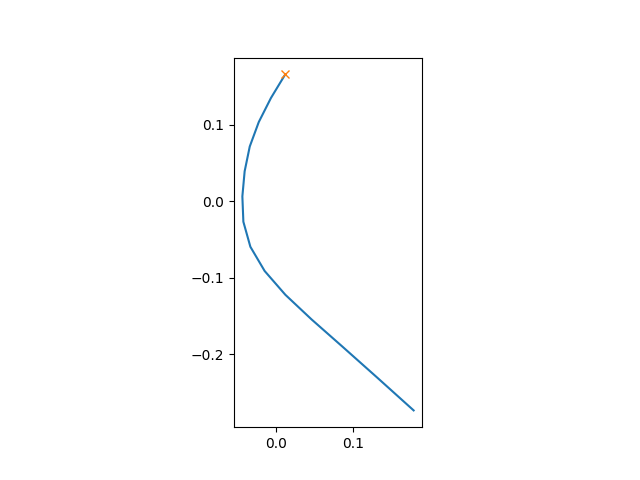

<IPython.core.display.Javascript object>


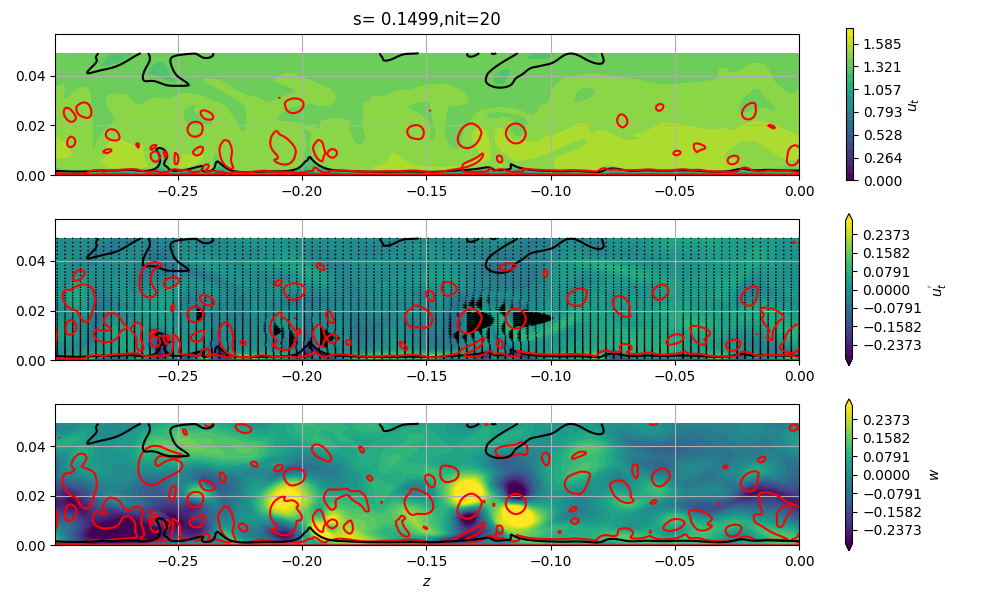

<IPython.core.display.Javascript object>


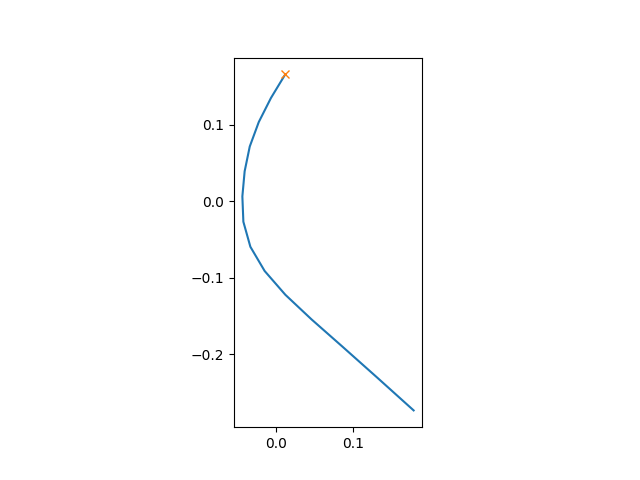

<IPython.core.display.Javascript object>


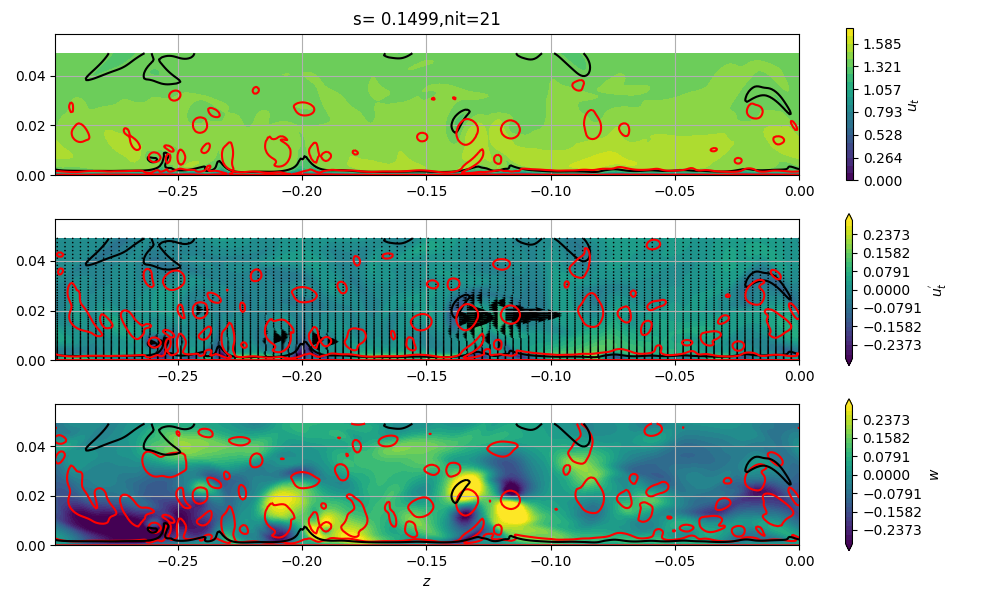

<IPython.core.display.Javascript object>


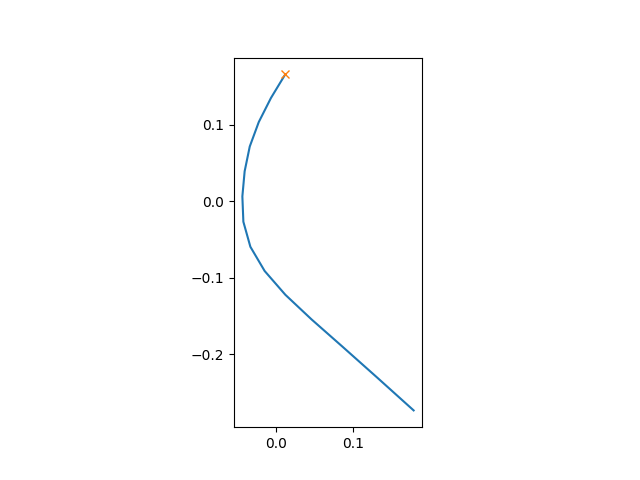

<IPython.core.display.Javascript object>


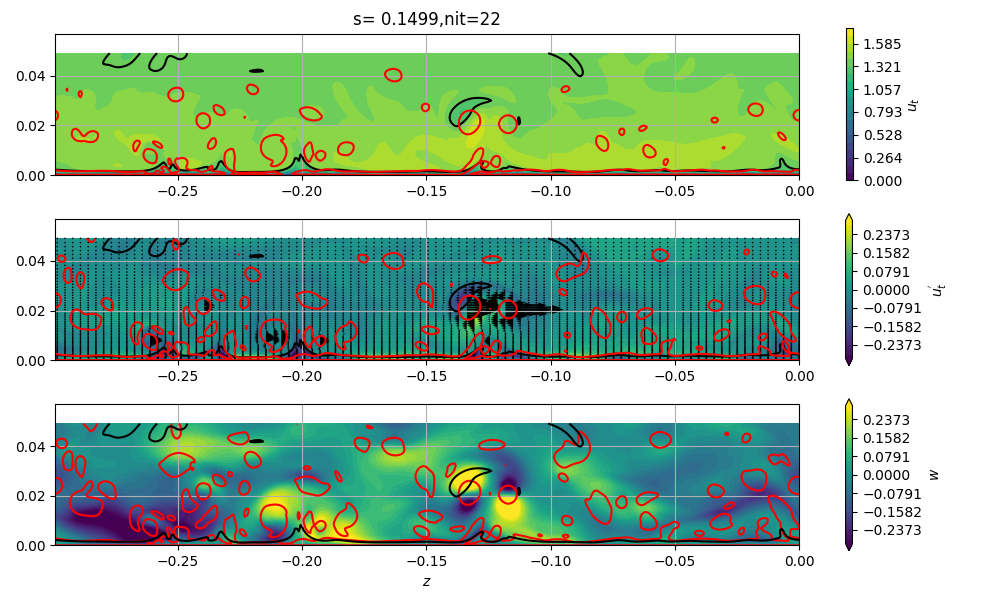

<IPython.core.display.Javascript object>


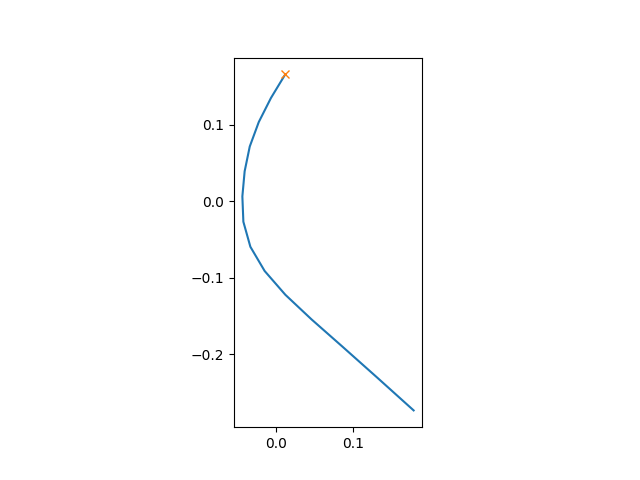

<IPython.core.display.Javascript object>


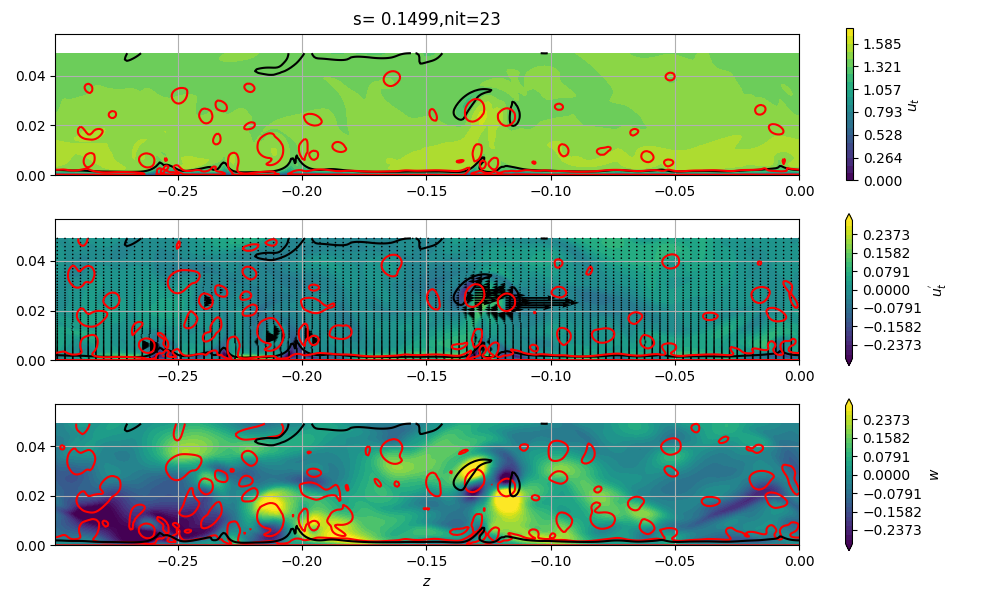

<IPython.core.display.Javascript object>


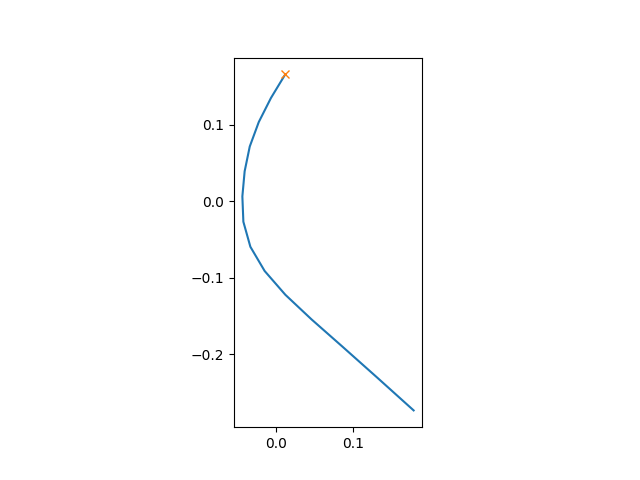

<IPython.core.display.Javascript object>


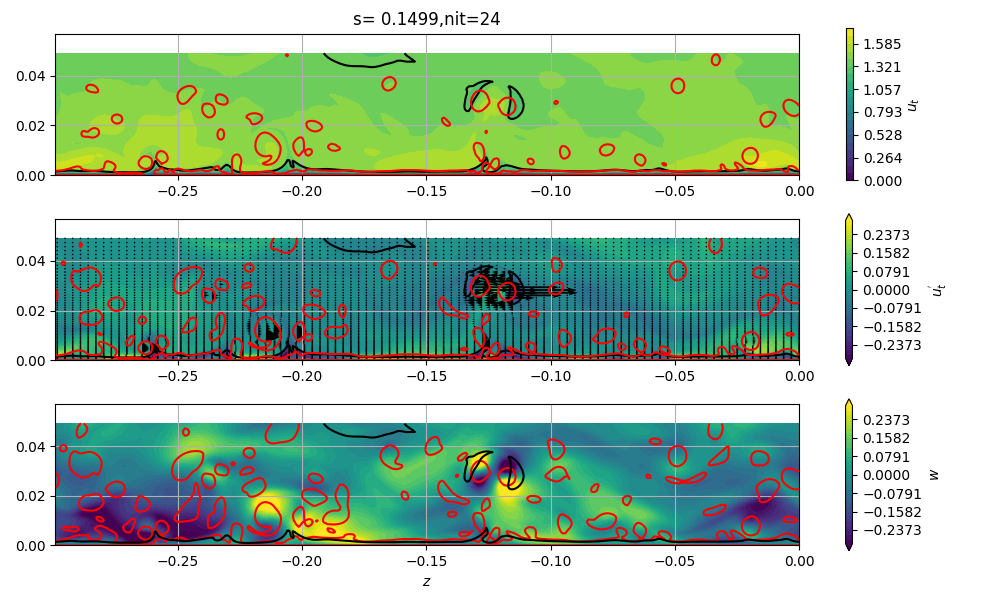

<IPython.core.display.Javascript object>


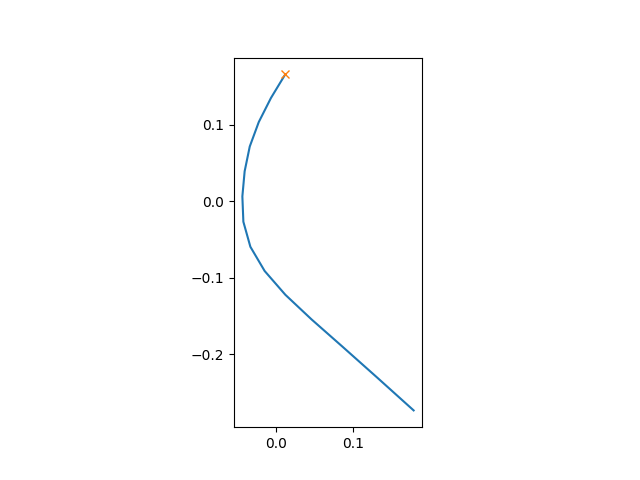

<IPython.core.display.Javascript object>


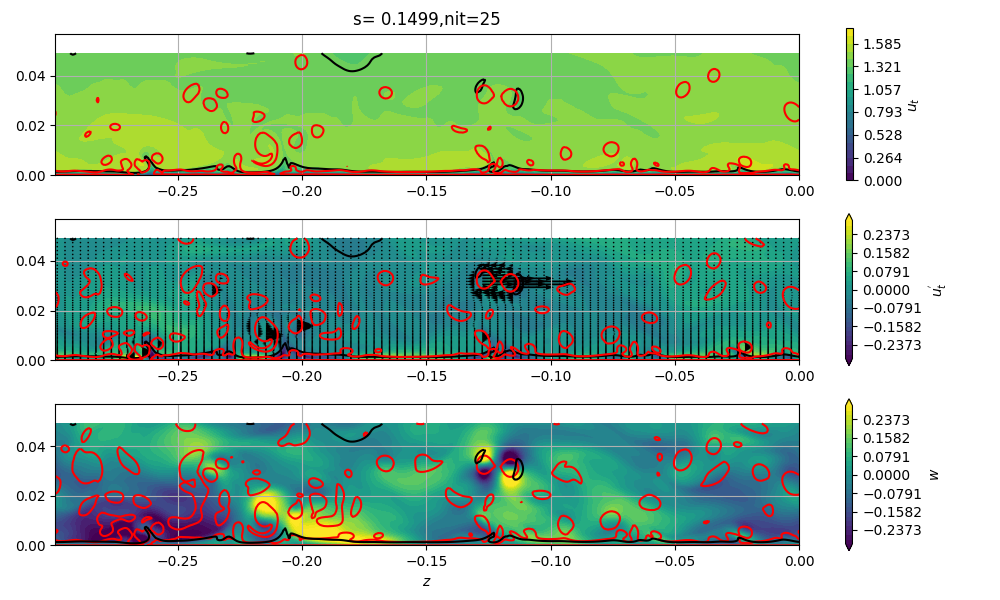

<IPython.core.display.Javascript object>


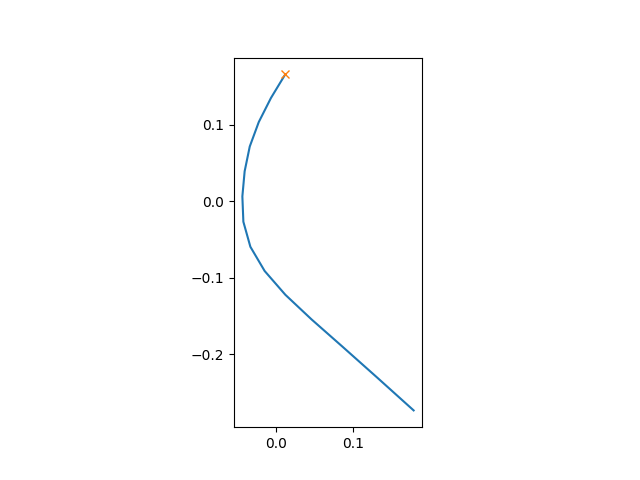

<IPython.core.display.Javascript object>


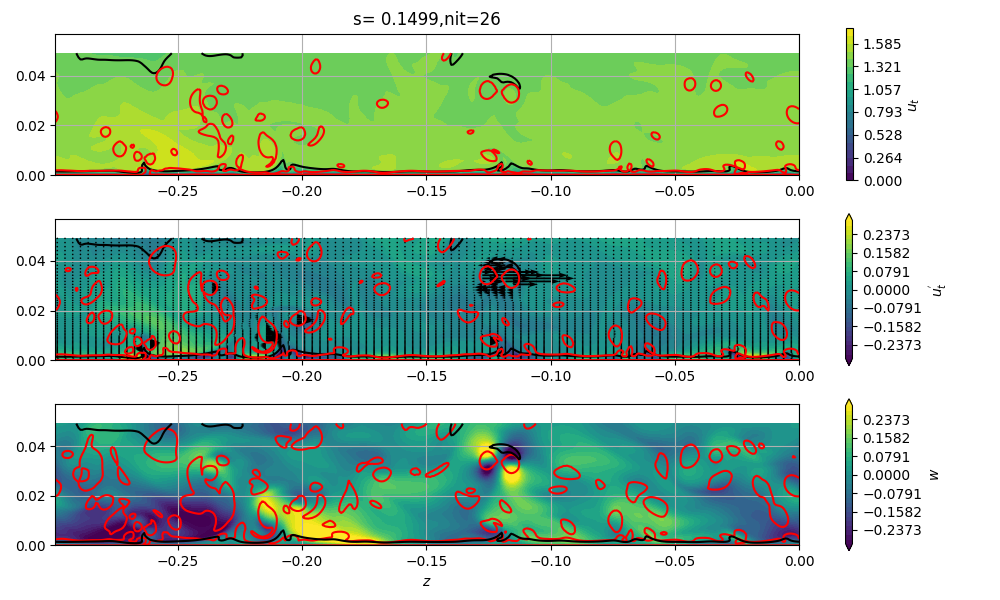

<IPython.core.display.Javascript object>


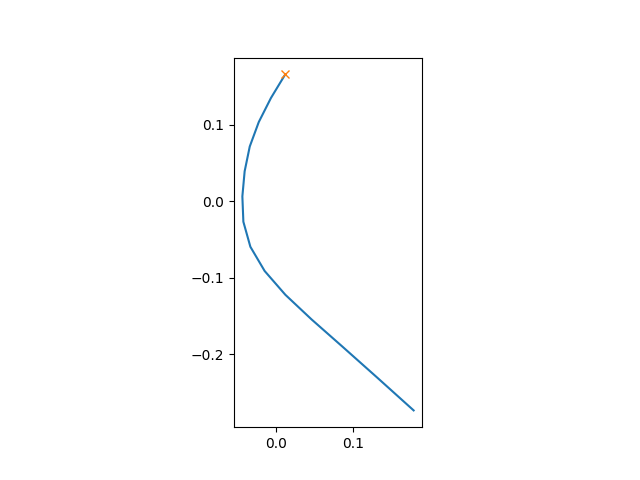

<IPython.core.display.Javascript object>


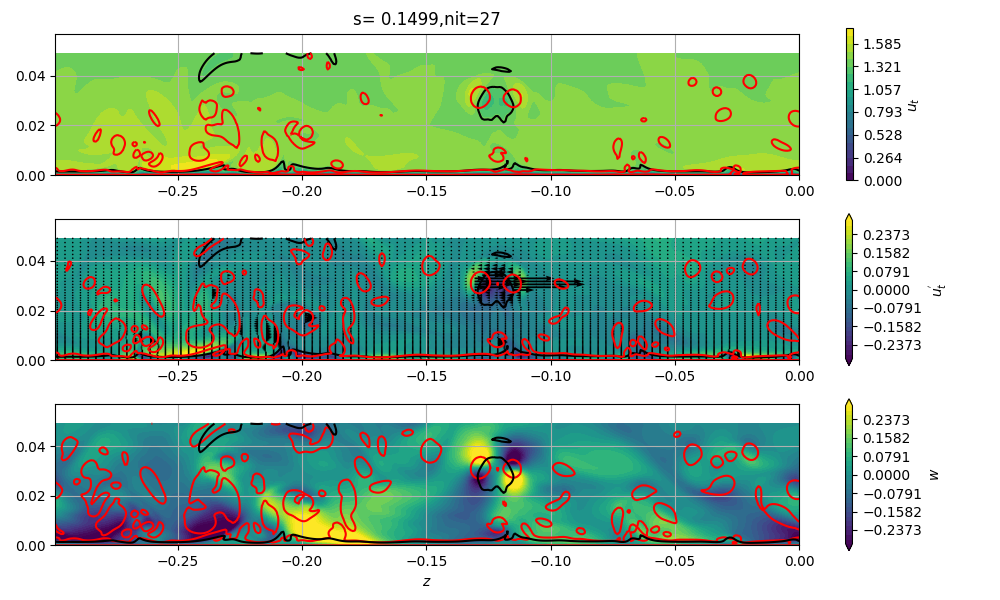

<IPython.core.display.Javascript object>


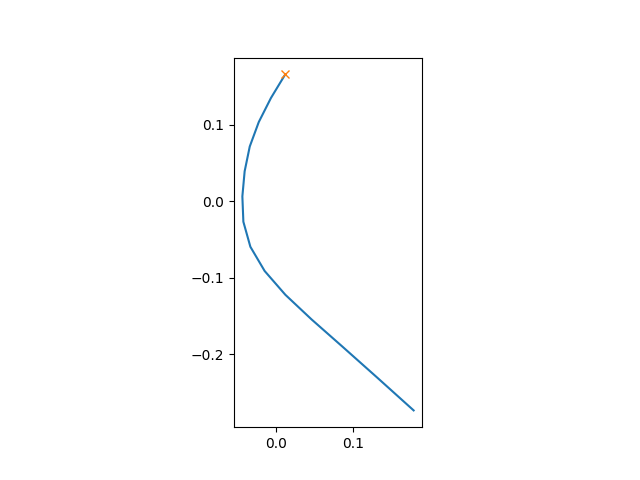

<IPython.core.display.Javascript object>


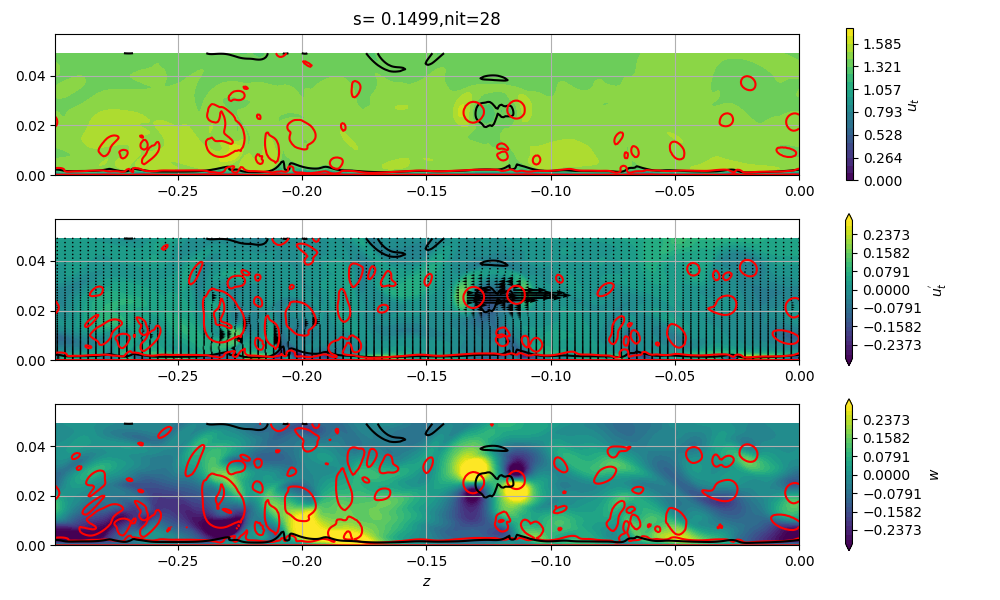

<IPython.core.display.Javascript object>


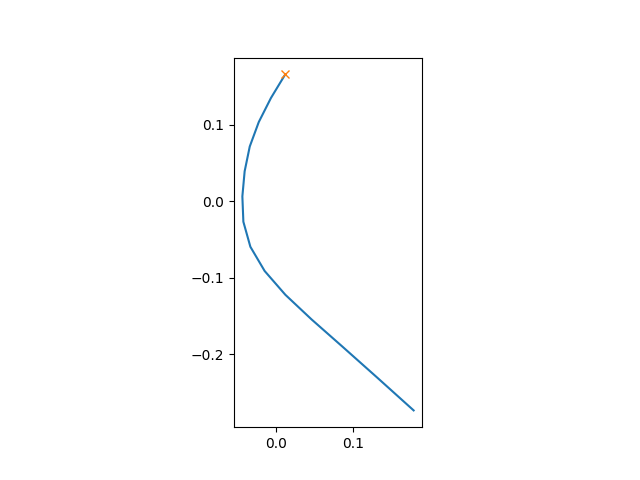

<IPython.core.display.Javascript object>


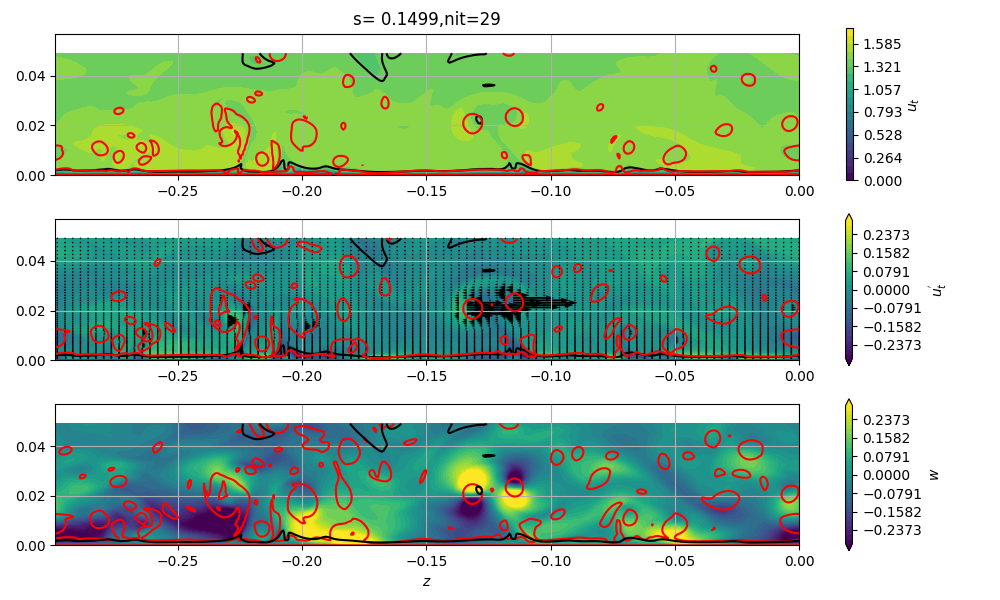

<IPython.core.display.Javascript object>


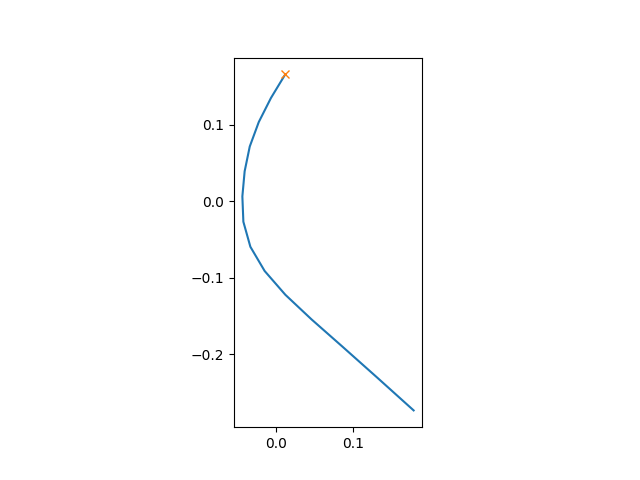

<IPython.core.display.Javascript object>


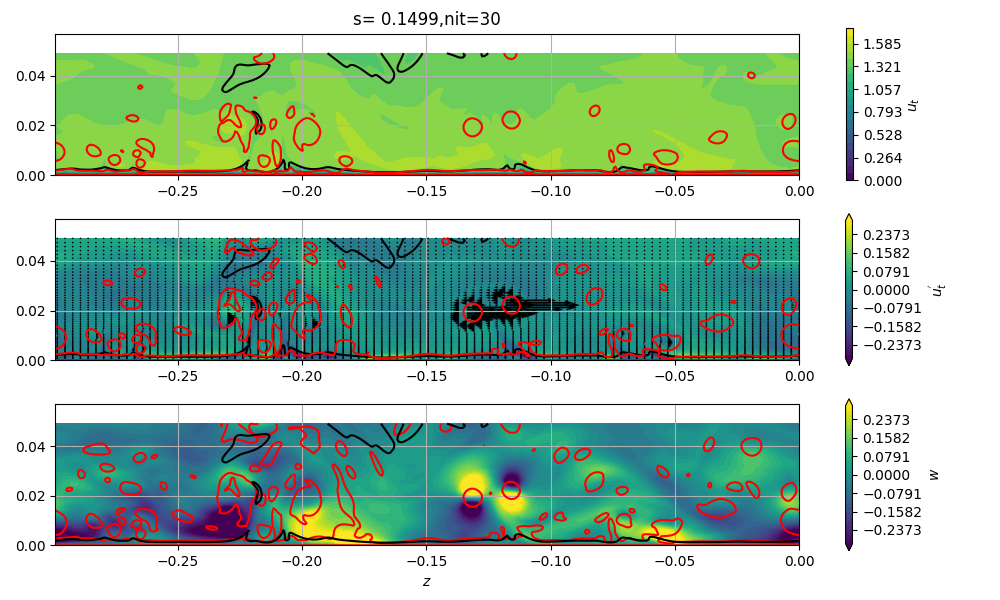

<IPython.core.display.Javascript object>


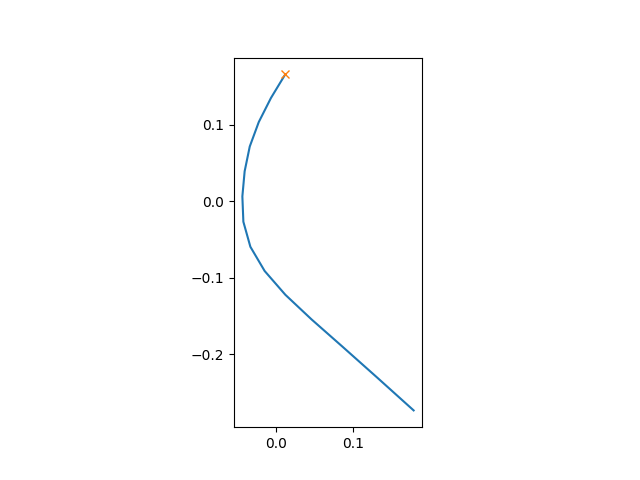

<IPython.core.display.Javascript object>


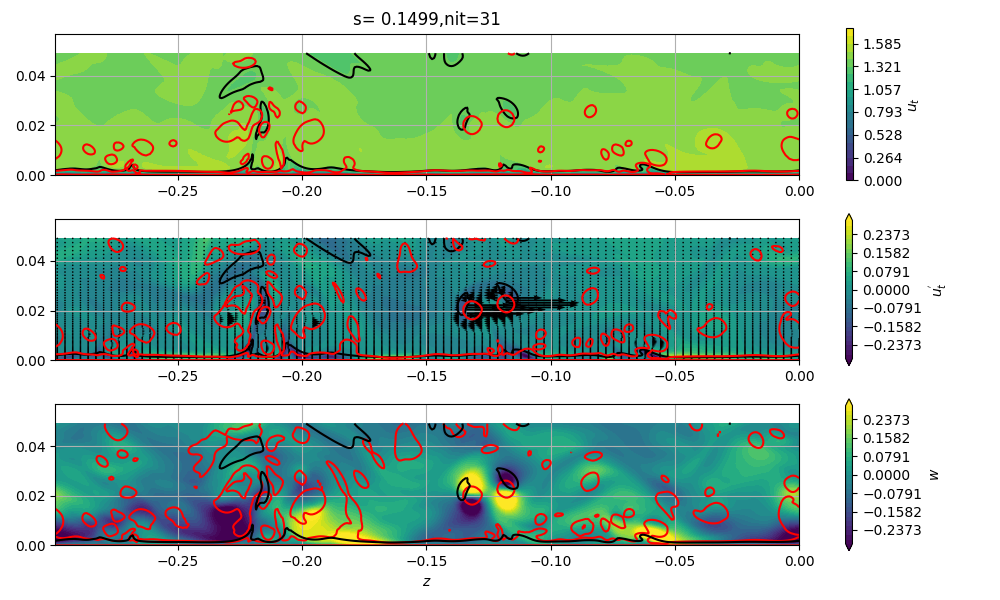

<IPython.core.display.Javascript object>


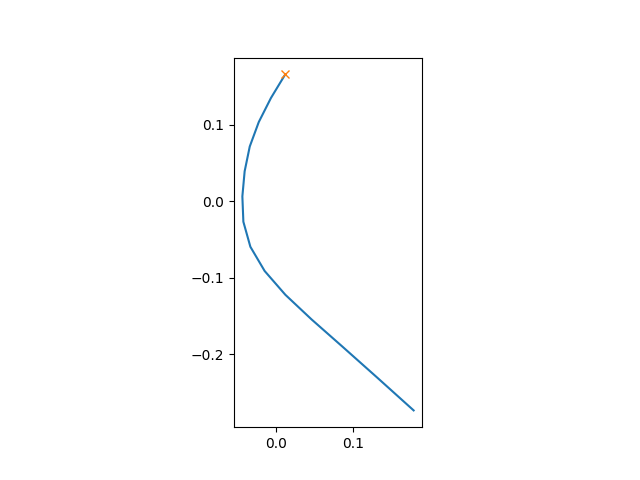

<IPython.core.display.Javascript object>


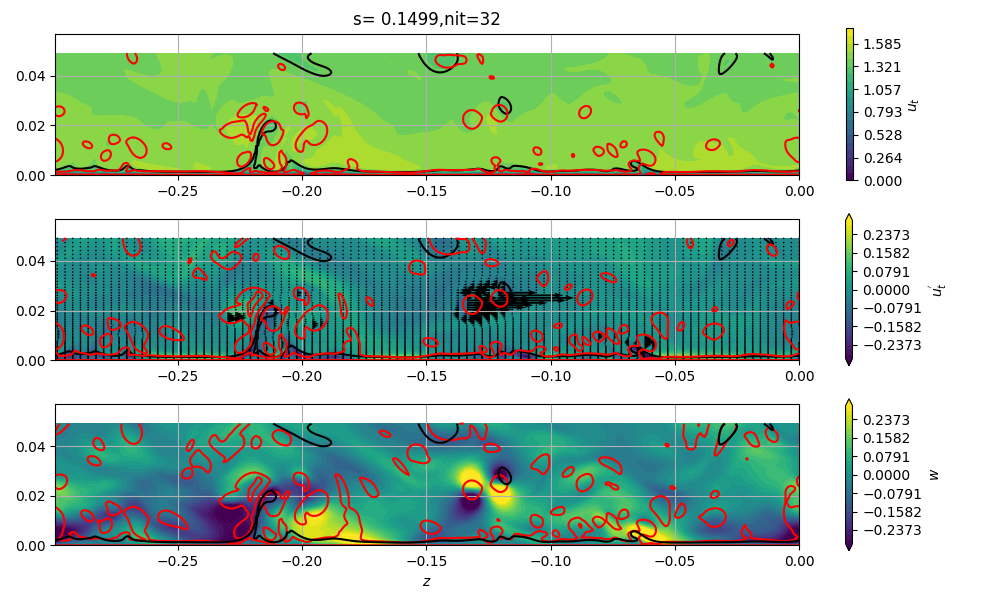

<IPython.core.display.Javascript object>


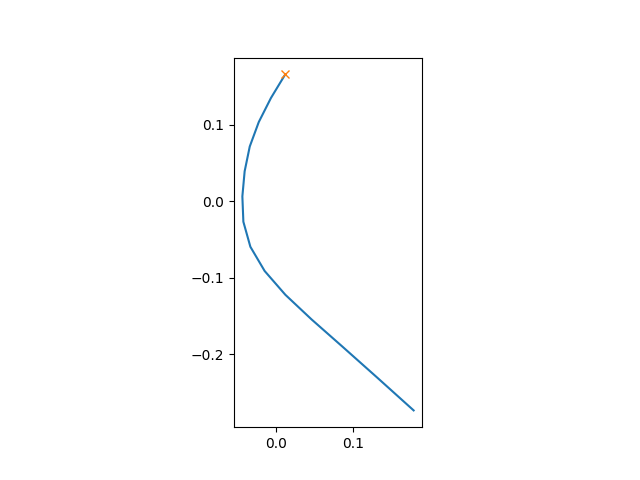

<IPython.core.display.Javascript object>


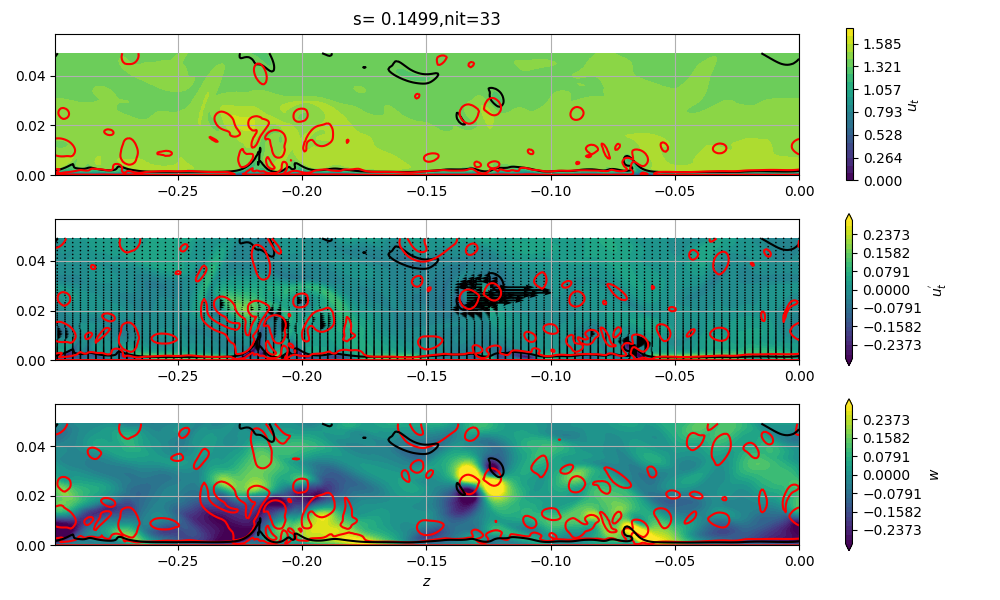

<IPython.core.display.Javascript object>


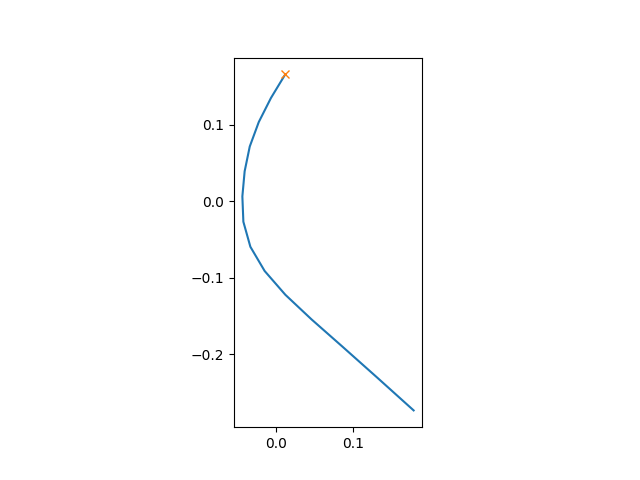

<IPython.core.display.Javascript object>


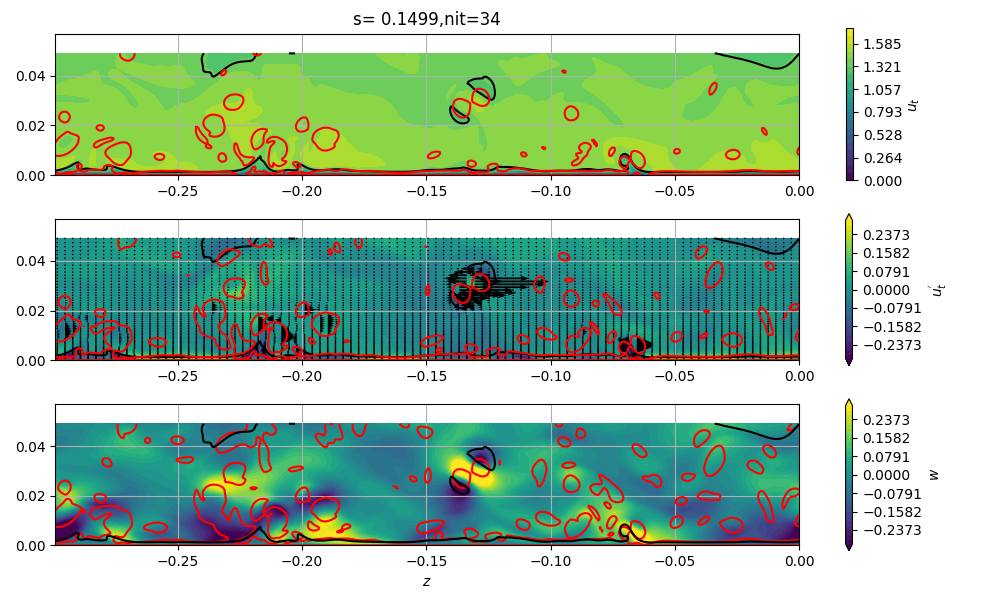

<IPython.core.display.Javascript object>


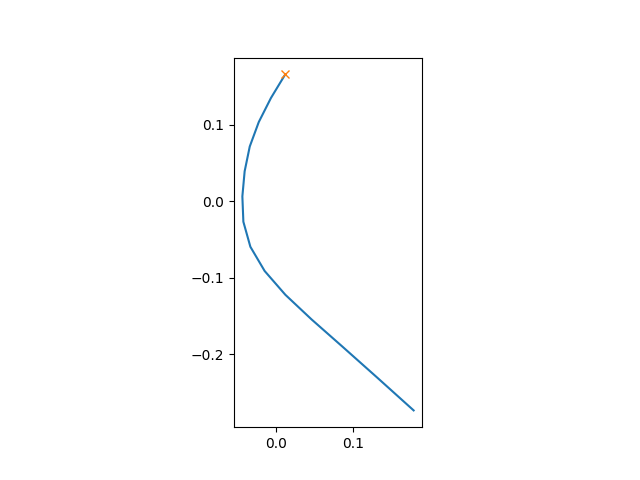

<IPython.core.display.Javascript object>


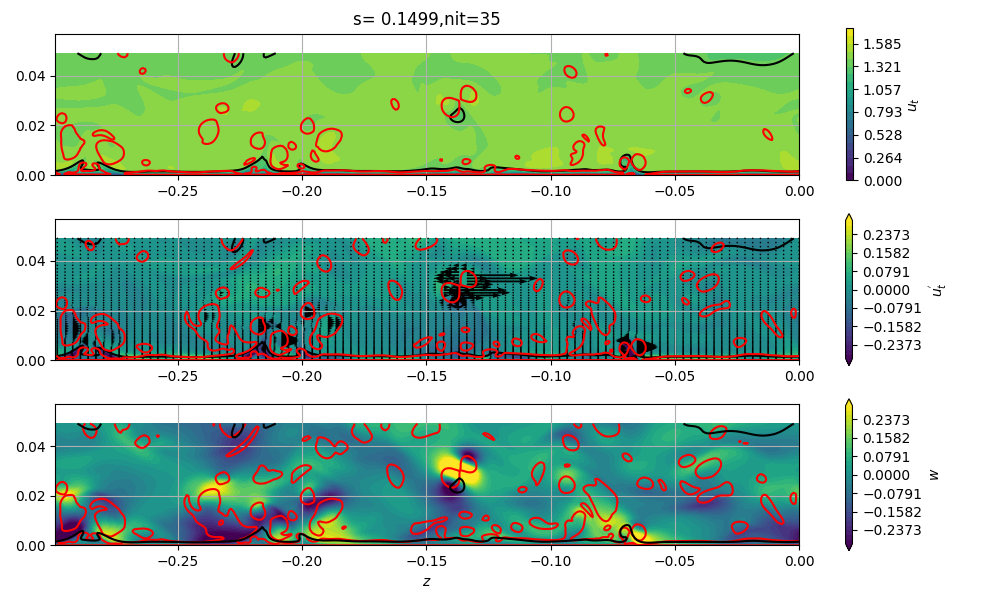

<IPython.core.display.Javascript object>


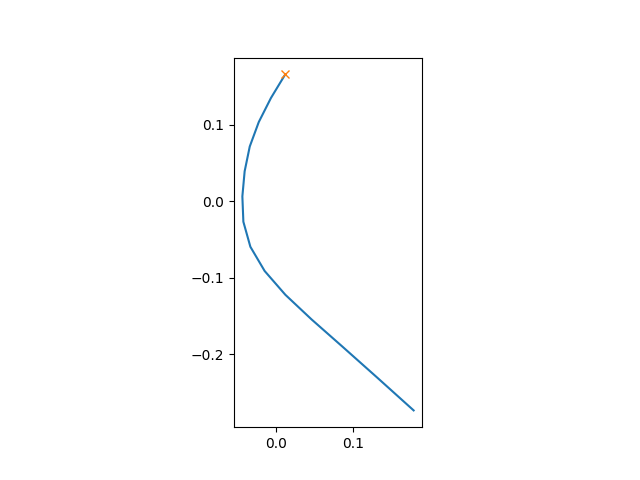

<IPython.core.display.Javascript object>


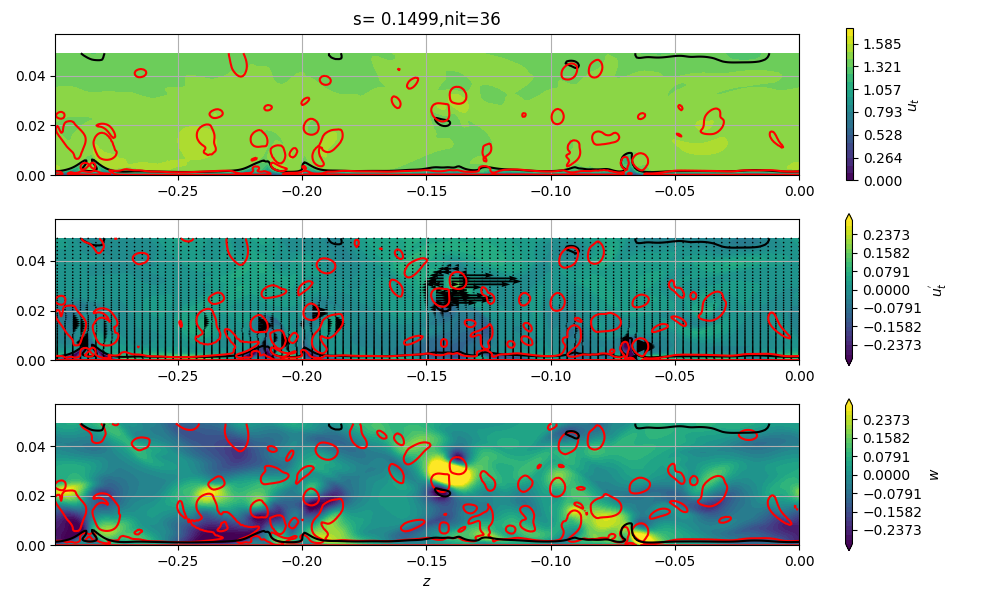

<IPython.core.display.Javascript object>


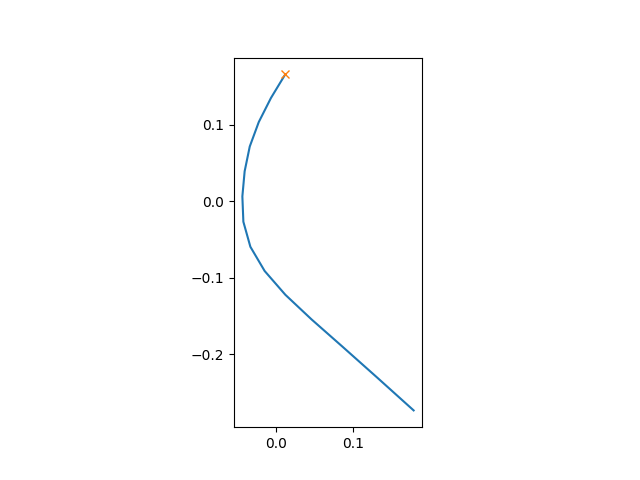

<IPython.core.display.Javascript object>


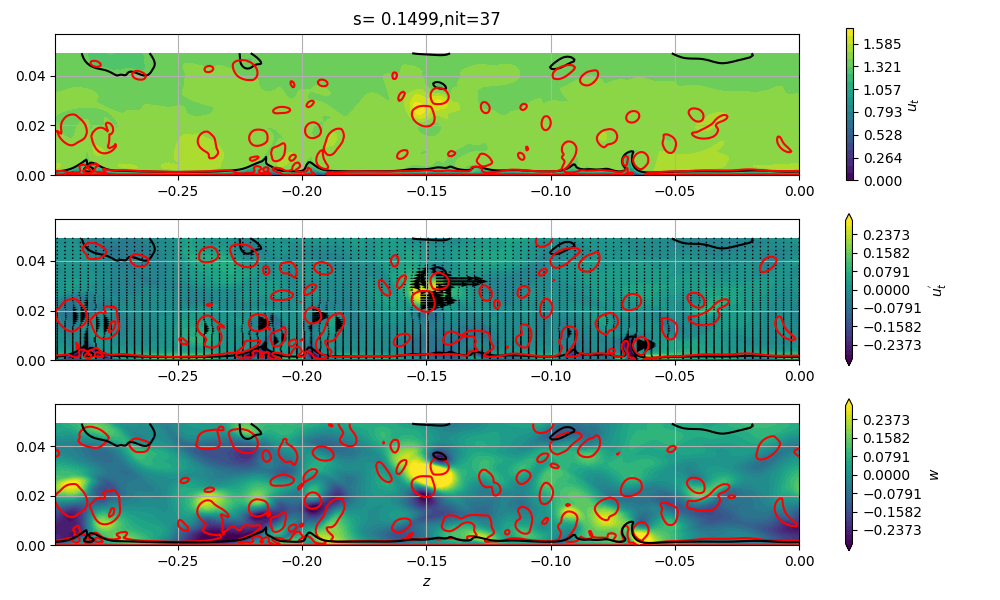

<IPython.core.display.Javascript object>


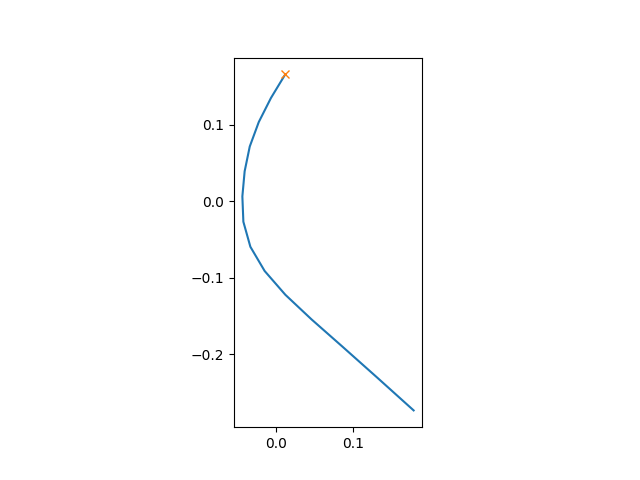

<IPython.core.display.Javascript object>


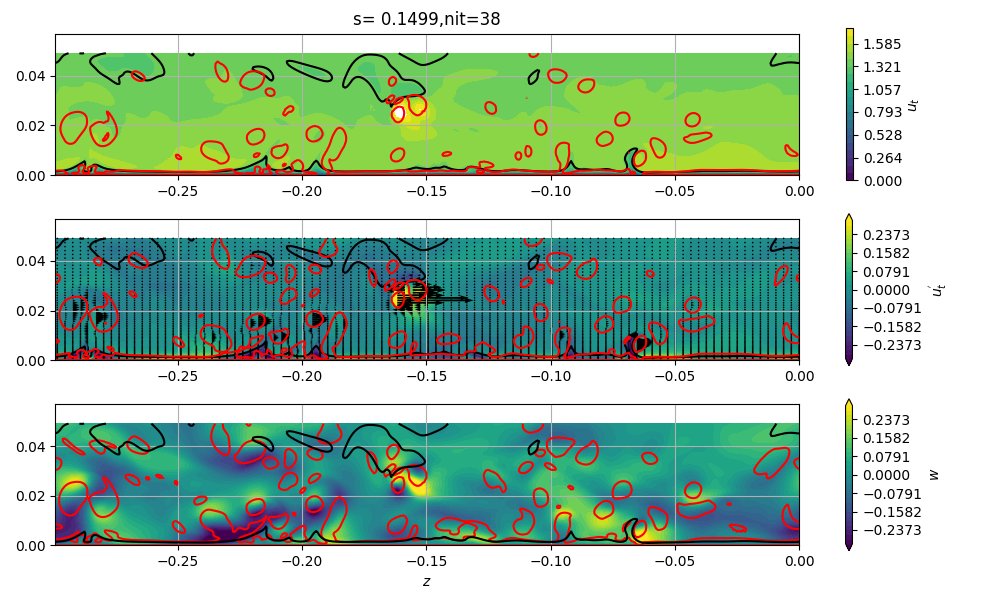

<IPython.core.display.Javascript object>


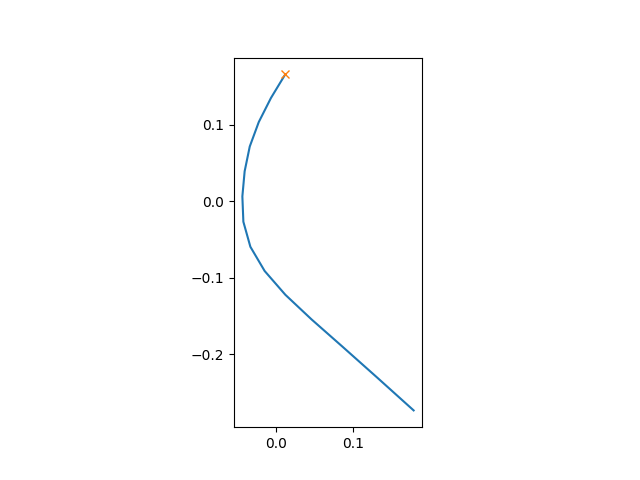

<IPython.core.display.Javascript object>


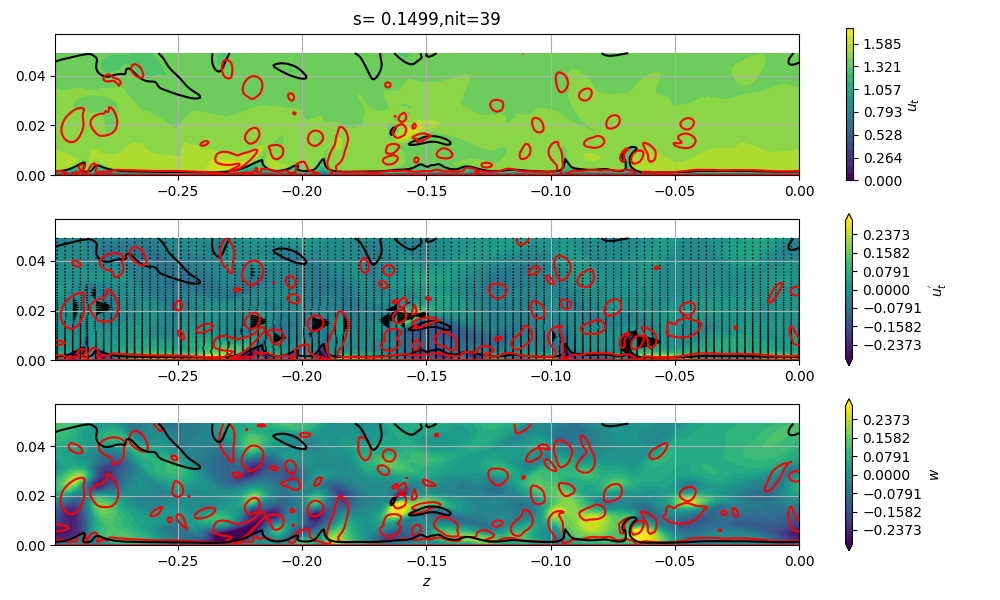

In [79]:
for ib in [0]:
    nx,ny,nz=turned_1.header[0][ib]    
    for j_val in [13]:
        with PdfPages('plane_j_%i.pdf'%j) as pdf:
            for nit in range(20,40): 
                plt.figure()
                plt.axes(aspect=1.)
                plt.plot(turned_1.grid[ib][0,0,:,0],turned_1.grid[ib][1,0,:,0])
                plt.plot(turned_1.grid[ib][0,0,j_val,0],turned_1.grid[ib][1,0,j_val,0],'x')
                i_temp=bl_ind[ib][j_val]
                ylim_t=turned_1.data[ib][1,0,i_temp,j_val,0]*15.
                fig=plt.figure(figsize=(10,6))  
                ax1 = plt.subplot2grid((3,10), (0,0),colspan=10)
                ax1.set_aspect(1.)
                if u_t_max[ib][j_val]<0:
                    one_temp=-1.
                else:
                    one_temp=1.            
                cb1=ax1.contourf(-turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:]
                                 ,one_temp*turned_1.data[ib][2,nit,:,j_val,:]
                                 ,levels=np.linspace(0,abs(u_t_max[ib][j_val]*1.2),num=21))
                plt.colorbar(cb1,label='$u_t$')
                plt.title('s=%7.4f,nit=%i'%(dist_red[ib][j_val],nit))
        #        ax1.contour(turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][2,0,:,j_val,:]
        #                     ,levels=[u_t_max[ib][j_val]],color='k')
                ax1.contour(-turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][2,nit,:,j_val,:]
                             ,levels=[u_t_max[ib][j_val]*0.9/0.99],colors=['k'])
                ax1.contour(-turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][11,nit,:,j_val,:]
                             ,levels=[500],colors=['r'])    
                ax1.set_ylim([0.,ylim_t])
                ax2 = plt.subplot2grid((3,10), (1,0),colspan=10)
                ax2.set_aspect(1.)            
                ten_percent_u_t=abs(u_t_max[ib][j_val]*0.2/0.99)
                cb2=ax2.contourf(-turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][4,nit,:,j_val,:]
                             ,levels=np.linspace(-ten_percent_u_t,ten_percent_u_t,num=31),extend='both')
                ax2.set_ylim([0.,ylim_t])
                plt.colorbar(cb2,label="$u_t^{'}$")
                ax2.contour(-turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][2,nit,:,j_val,:]
                             ,levels=[u_t_max[ib][j_val]*0.9/0.99],colors=['k'])        
                ax2.contour(-turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][11,nit,:,j_val,:]
                             ,levels=[200],colors=['r'])  
                ax2.quiver(-turned_1.grid[ib][2,::2,j_val,::4],turned_1.data[ib][1,0,::2,j_val,::4]
                           ,turned_1.data[ib][11,nit,::2,j_val,::4],turned_1.data[ib][3,nit,::2,j_val,::4]
                             ,scale=600000)          

                ax3 = plt.subplot2grid((3,10), (2,0),colspan=10)
                ax3.set_aspect(1.)
                cb3=ax3.contourf(-turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][10,nit,:,j_val,:]
                             ,levels=np.linspace(-ten_percent_u_t,ten_percent_u_t,num=31),extend='both')
                plt.colorbar(cb3,label=r"$w$")
                ax3.contour(-turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][11,nit,:,j_val,:]
                             ,levels=[100],colors=['r'])      
                #ax3.set_ylim([0.,ylim_t])   
                ax3.contour(-turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][2,nit,:,j_val,:]
                             ,levels=[u_t_max[ib][j_val]*0.9/0.99],colors=['k'])                
                ax3.set_xlabel('$z$')
                ax1.grid()
                ax2.grid()
                ax3.grid()                
                plt.tight_layout()                
                #plt.savefig('../video_planes/plane_time_laps_u_t_ib%i_j%i_time%i.png'%(ib,j_val,steps[nit]))
                pdf.savefig()   
        gc.collect()

In [40]:
#mean tau_w
tau_mean=[]
for ib in range(n_bl):
    nx,ny,nz=tau_w.header[0][ib]    
    tau_mean.append(np.zeros([ny,4]))
    for k in range(nz):
        for j in range(ny):
            i=0
            for nit in range(len(steps)):
                tau_mean[-1][j,0]+=tau_w.data[ib][0,nit,0,j,k]
                tau_mean[-1][j,1]+=tau_w.data[ib][1,nit,0,j,k]
    for j in range(ny):
            tau_mean[-1][j,0:2]/=float(nz*len(steps))
    for k in range(nz):
        for j in range(ny):
            i=0
            for nit in range(len(steps)):
                tau_mean[-1][j,2]+=(tau_w.data[ib][0,nit,0,j,k]-tau_mean[-1][j,0])**2
                tau_mean[-1][j,3]+=(tau_w.data[ib][1,nit,0,j,k]-tau_mean[-1][j,1])**2

    tau_mean[-1][:,2:]/=float(nz*len(steps))   
    tau_mean[-1][:,2:]=np.sqrt(tau_mean[-1][:,2:])

<IPython.core.display.Javascript object>


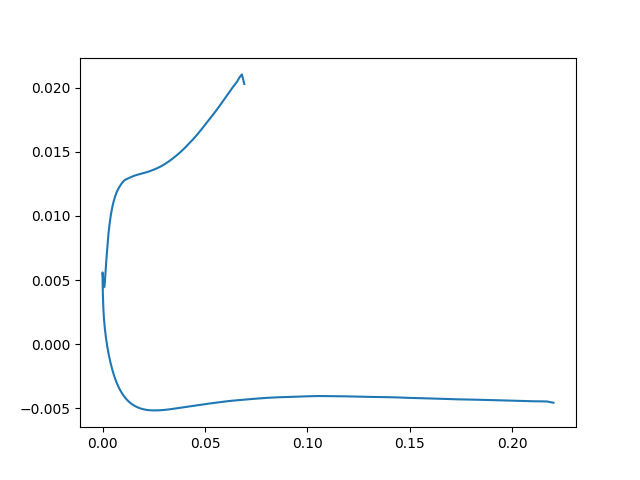

<IPython.core.display.Javascript object>


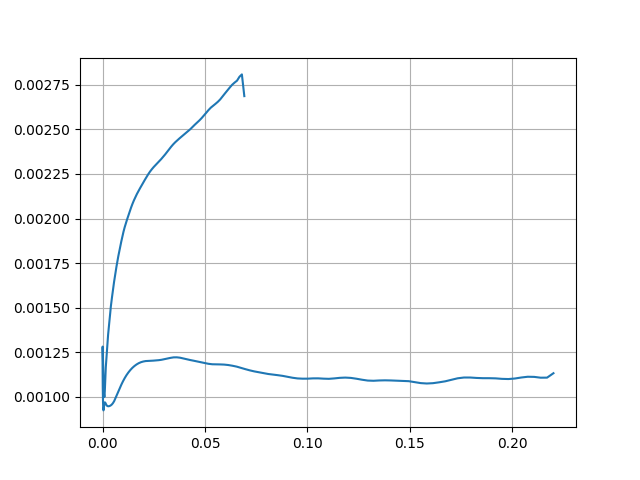

In [41]:
plt.figure()
for ib in range(n_bl):
    plt.plot(tau_w.grid[ib][0,0,:,0],-tau_mean[ib][:,0])
plt.figure()
for ib in range(n_bl):    
    plt.plot(tau_w.grid[ib][0,0,:,0],tau_mean[ib][:,2])        
plt.grid()

# Correlations

In [59]:
nx,ny,nz=tau_w.header[0][ib]
ib=0
corr_tau_qn=[]
corr_tau_qn.append(np.zeros([ny]))
for k in range(nz):
    for j in range(ny):
        for nit in range(len(steps)):
            corr_tau_qn[-1][j]+=((tau_w.data[ib][0,nit,0,j,k]-tau_mean[ib][j,0])*
                              (tau_w.data[ib][1,nit,0,j,k]-tau_mean[ib][j,1]))
corr_tau_qn[-1][:]/=float(nz*len(steps))
corr_tau_qn[-1][:]/=(tau_mean[ib][:,2]*tau_mean[ib][:,3])

<IPython.core.display.Javascript object>


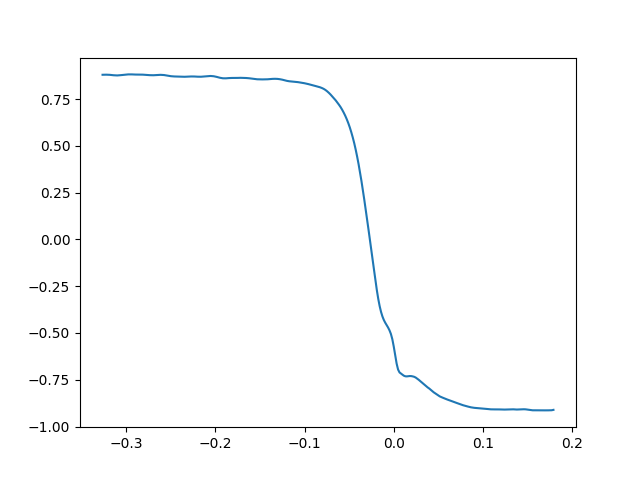

In [60]:
plt.figure()
plt.plot(dist[ib],corr_tau_qn[ib])

In [38]:
ib=0
nx,ny,nz=turned_1.header[0][ib]
corr_tau_w.append(np.zeros([3,ny,nx]))
for k in range(nz):
    for j in range(ny):
        for i in range(nx):
            j_tau=j*16
            corr_tau_w[ib][0,j,i]+=np.correlate((tau_w.data[ib][0,:,0,j,k]-tau_mean[ib][j,0])
                                            ,turned_1.data[ib][4,:,i,j,k])
            corr_tau_w[ib][0,j,i]+=np.correlate((tau_w.data[ib][1,:,0,j,k]-tau_mean[ib][j,1])
                                            ,turned_1.data[ib][4,:,i,j,k])            
corr_tau_w[ib][:,:,:]/=float(nz*len(steps))


In [ ]:
ib=0
dist_red_all.append(np.empty([nx,ny]))
for i in range(j)

In [ ]:
plt.figure()
plt.plot()